<a href="https://colab.research.google.com/github/Saritha199/CODSOFT/blob/machine-learning/creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**

In [254]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#create dataframe
df = pd.read_csv('/content/fraudTrain.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209568,209568,2019-04-17 00:06:35,4181833256558613886,fraud_Huel Ltd,misc_net,8.01,Jessica,Potter,F,7600 Stephen Course Suite 031,...,36.6659,-105.4694,606,"Surveyor, land/geomatics",1988-09-06,f4976a35bd702f8e1ac80dc70348be29,1.334621e+09,36.252671,-104.709580,0.0
209569,209569,2019-04-17 00:08:16,60422928733,fraud_VonRueden Group,grocery_net,8.05,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,...,33.6028,-81.9748,46944,Secondary school teacher,1942-04-02,845e5321a5bd5e978452cc8554655aa4,1.334621e+09,32.914009,-82.795557,1.0
209570,209570,2019-04-17 00:08:43,3561963695236764,"fraud_Kuhic, Bins and Pfeffer",shopping_net,97.91,Michael,Lee,M,7915 Dawn Roads Apt. 544,...,41.0640,-72.3366,1858,Clinical biochemist,1984-03-03,1753324531b9c9a13a3c37b471092297,1.334621e+09,41.586599,-71.940873,0.0
209571,209571,2019-04-17 00:13:47,377234009633447,fraud_Kiehn Inc,grocery_pos,147.93,Theresa,Blackwell,F,43576 Kristina Islands,...,39.3716,-77.8229,1925,Systems developer,1966-02-14,751861628077d1633f9a691f1d15f11f,1.334622e+09,40.197883,-78.726875,0.0


In [255]:
#printing head and tail of dataset to get the overview of the dataset
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [256]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
209568,209568,2019-04-17 00:06:35,4181833256558613886,fraud_Huel Ltd,misc_net,8.01,Jessica,Potter,F,7600 Stephen Course Suite 031,...,36.6659,-105.4694,606,"Surveyor, land/geomatics",1988-09-06,f4976a35bd702f8e1ac80dc70348be29,1.334621e+09,36.252671,-104.709580,0.0
209569,209569,2019-04-17 00:08:16,60422928733,fraud_VonRueden Group,grocery_net,8.05,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,...,33.6028,-81.9748,46944,Secondary school teacher,1942-04-02,845e5321a5bd5e978452cc8554655aa4,1.334621e+09,32.914009,-82.795557,1.0
209570,209570,2019-04-17 00:08:43,3561963695236764,"fraud_Kuhic, Bins and Pfeffer",shopping_net,97.91,Michael,Lee,M,7915 Dawn Roads Apt. 544,...,41.0640,-72.3366,1858,Clinical biochemist,1984-03-03,1753324531b9c9a13a3c37b471092297,1.334621e+09,41.586599,-71.940873,0.0
209571,209571,2019-04-17 00:13:47,377234009633447,fraud_Kiehn Inc,grocery_pos,147.93,Theresa,Blackwell,F,43576 Kristina Islands,...,39.3716,-77.8229,1925,Systems developer,1966-02-14,751861628077d1633f9a691f1d15f11f,1.334622e+09,40.197883,-78.726875,0.0
209572,209572,2019-04-17 00:17:05,4800395067176717,fraud_Williamson LLC,misc_pos,1.30,Daniel,Owens,M,88794 Mandy Lodge Apt. 874,...,41.6964,-96.9858,1063,Research scientist (maths),1928-04-02,8d752aed38e8b19527,NaN,NaN,NaN,NaN


In [257]:
#checking for missing values
df.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [258]:
df = df.dropna()

In [259]:
#check for datatypes
df.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [260]:
#check for class imbalance
#target class count
df['is_fraud'].value_counts()

,count
is_fraud,
0.0,207881
1.0,1691


percentage of 0 and 1


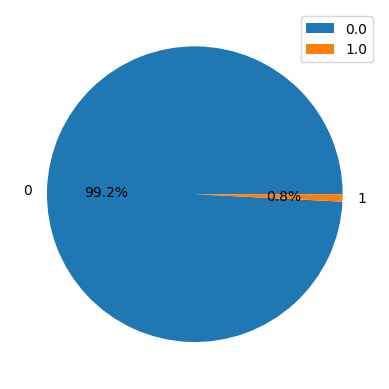

In [261]:
# percentage of class present in target variable(is_fraud)
print("percentage of 0 and 1")
labels=['0','1']
plt.pie(df['is_fraud'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.legend(df['is_fraud'].value_counts().index)

In [262]:
 #checking duplicate entries
print("Duplicate entries:", df.duplicated().sum())

Duplicate entries: 0


In [263]:
#Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2703186189652095,514,8,4.97,155,18,0,541,...,36.0788,-81.1781,3495,359,736,9136,1.325376e+09,36.011293,-82.048315,0.0
1,1,1,630423337322,241,4,107.23,299,155,0,416,...,48.8878,-118.2105,149,415,564,25756,1.325376e+09,49.159047,-118.186462,0.0
2,2,2,38859492057661,390,0,220.11,108,376,1,575,...,42.1808,-112.2620,4154,297,271,132032,1.325376e+09,43.150704,-112.154481,0.0
3,3,3,3534093764340240,360,2,45.00,156,453,1,883,...,46.2306,-112.1138,1939,318,357,87852,1.325376e+09,47.034331,-112.561071,0.0
4,4,4,375534208663984,297,9,41.96,325,147,1,401,...,38.4207,-79.4629,99,112,691,134020,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209567,209567,206715,5501083170975659,57,9,5.12,334,330,1,565,...,41.1464,-81.5107,47772,178,338,110553,1.334621e+09,40.873153,-81.571495,0.0
209568,209568,206716,4181833256558613886,269,8,8.01,159,339,0,730,...,36.6659,-105.4694,606,426,745,200153,1.334621e+09,36.252671,-104.709580,0.0
209569,209569,206717,60422928733,650,3,8.05,153,341,1,380,...,33.6028,-81.9748,46944,405,75,107975,1.334621e+09,32.914009,-82.795557,1.0
209570,209570,206718,3561963695236764,347,11,97.91,235,240,1,756,...,41.0640,-72.3366,1858,83,650,19196,1.334621e+09,41.586599,-71.940873,0.0


In [264]:
#Dropping irrelvent columns
df.drop(['Unnamed: 0','trans_date_trans_time'],axis=1,inplace=True)

In [265]:
corr=df.corr()


<Axes: >

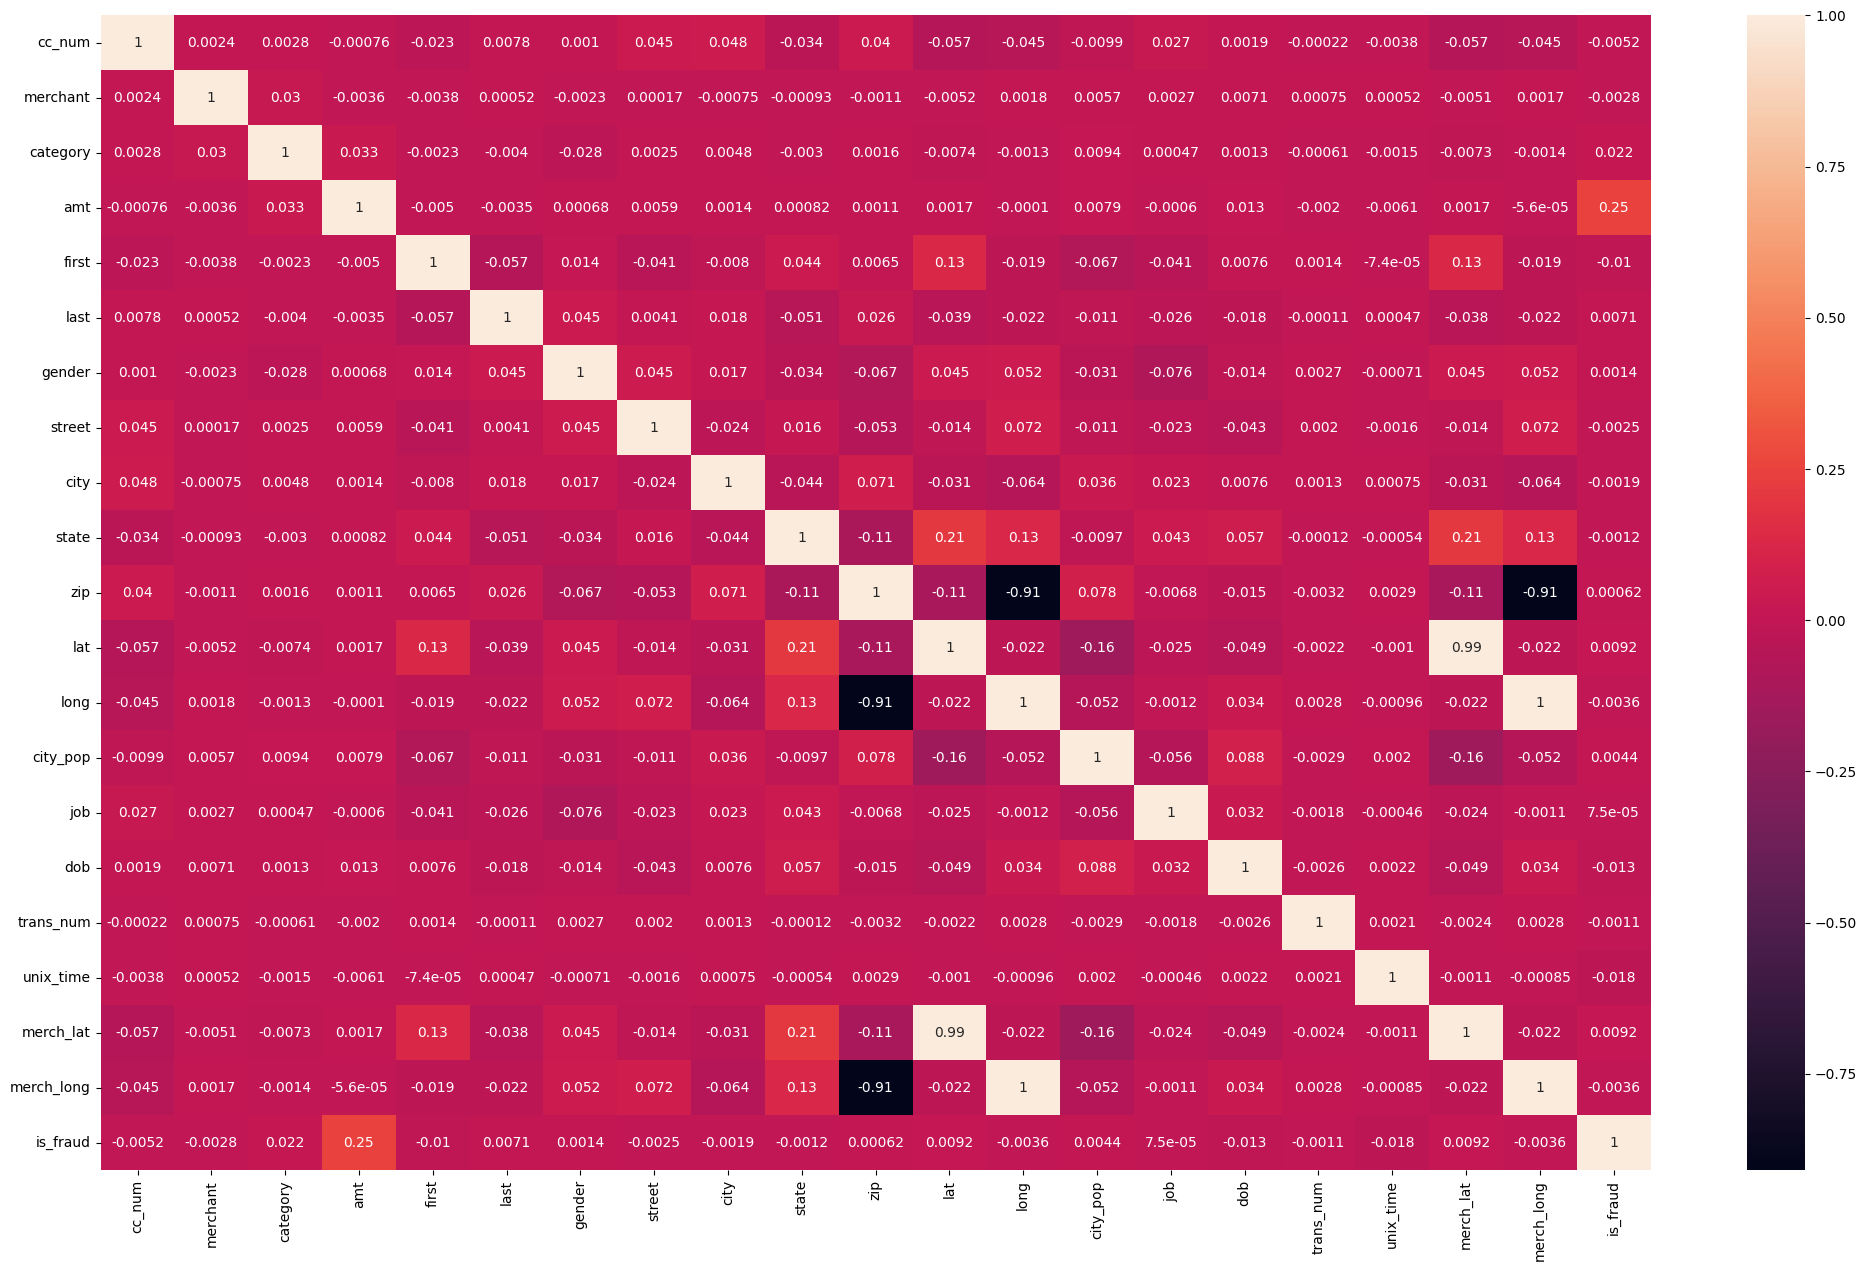

In [266]:
#Drawing a heatmap in order to find out the correlation
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True)

<Axes: >

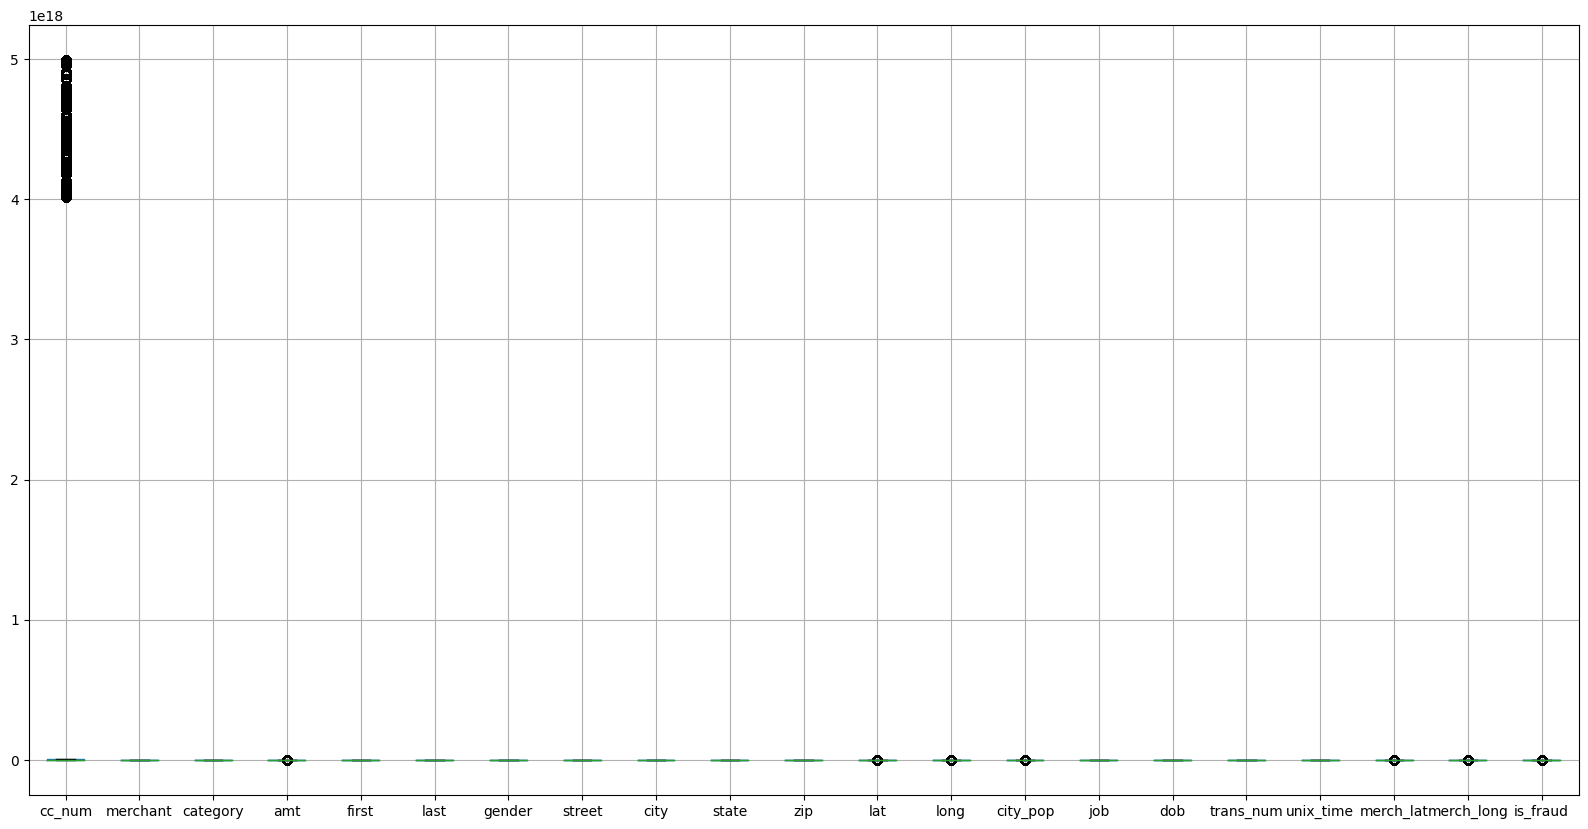

In [267]:
#plotting boxplot inorder to findout outlayers
plt.figure(figsize=(20,10))
df.boxplot()

In [268]:
columns=df.columns[df.columns !='is_fraud']
columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'],
      dtype='object')

In [269]:
#Removing outlayers using IQR method
def iqr_rem(dfe,cols):
  for col in cols:
    q1=dfe[col].quantile(0.25)
    q3=dfe[col].quantile(0.75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    dfe[col]=dfe[col].clip(lower_bound,upper_bound)
iqr_rem(df,columns)

<Axes: >

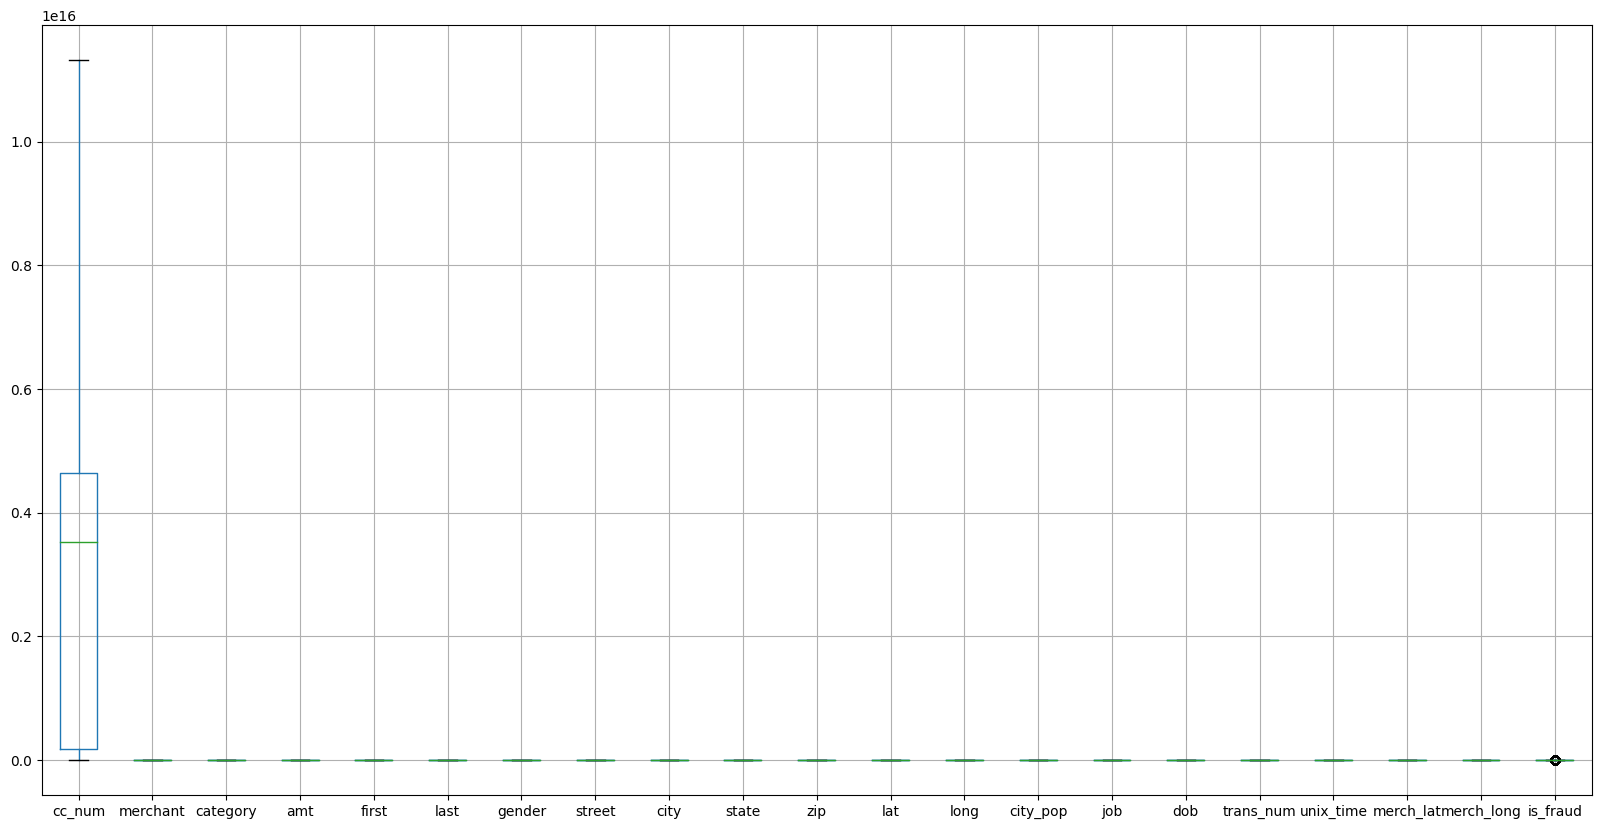

In [270]:
#verifying whether outlayers is removed or not
plt.figure(figsize=(20,10))
df.boxplot()

In [271]:
#output column is in float datatype,so that it is converted into integer
df['is_fraud'] = df['is_fraud'].astype('int')

In [272]:
#splitting training data into x_train and y_train
x_train = df.drop(['is_fraud'], axis=1)
x_train


,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,2703186189652095,514,8,4.97,155,18,0,541,506,26,28654,36.0788,-81.1781,3495,359,736,9136,1.325376e+09,36.011293,-82.048315
1,630423337322,241,4,107.23,299,155,0,416,583,46,99160,48.8878,-118.2105,149,415,564,25756,1.325376e+09,49.159047,-118.186462
2,38859492057661,390,0,194.04,108,376,1,575,452,12,83252,42.1808,-112.2620,4154,297,271,132032,1.325376e+09,43.150704,-112.154481
3,3534093764340240,360,2,45.00,156,453,1,883,82,25,59632,46.2306,-112.1138,1939,318,357,87852,1.325376e+09,47.034331,-112.561071
4,375534208663984,297,9,41.96,325,147,1,401,209,44,24433,38.4207,-79.4629,99,112,691,134020,1.325376e+09,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209567,5501083170975659,57,9,5.12,334,330,1,565,184,34,44223,41.1464,-81.5107,47772,178,338,110553,1.334621e+09,40.873153,-81.571495
209568,11318271722579788,269,8,8.01,159,339,0,730,650,31,87558,36.6659,-105.4694,606,426,745,200153,1.334621e+09,36.252671,-104.709580
209569,60422928733,650,3,8.05,153,341,1,380,552,39,29860,33.6028,-81.9748,46944,405,75,107975,1.334621e+09,32.914009,-82.795557
209570,3561963695236764,347,11,97.91,235,240,1,756,710,33,11964,41.0640,-72.3366,1858,83,650,19196,1.334621e+09,41.586599,-71.940873


In [273]:
y_train = df['is_fraud']


In [274]:
#creating dataframe
df_test = pd.read_csv('/content/fraudTest.csv')
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209529,209529,2020-09-02 17:48:50,676102124465,"fraud_O'Reilly, Mohr and Purdy",home,12.01,Natasha,Mclaughlin,F,8699 Lindsay Ford Apt. 486,...,38.4549,-122.2564,94014,Airline pilot,1985-08-21,0bf6f2788329ad66f6394e1156720b42,1.378144e+09,39.212464,-122.383972,0.0
209530,209530,2020-09-02 17:49:00,4607072969078276,fraud_Morissette PLC,shopping_pos,4.44,Brenda,Perez,F,033 Tara Brook Suite 523,...,35.8985,-97.2607,1493,Amenity horticulturist,1985-03-21,656fae320af99de0a68c14045bf5005f,1.378144e+09,35.625168,-96.975622,0.0
209531,209531,2020-09-02 17:49:02,4671727014157745,fraud_Bahringer-Streich,food_dining,96.24,Kenneth,Edwards,M,3653 Ryan Crossroad,...,40.8618,-85.6067,2304,Retail banker,1955-07-25,4cb6bbfe75192c6ab123ba7759f8c448,1.378144e+09,40.615751,-85.380118,0.0
209532,209532,2020-09-02 17:50:10,4538566639857,fraud_Cartwright PLC,kids_pets,44.92,Jerry,Kelly,M,3539 Mckenzie Stream,...,40.8170,-74.0000,13835,"Programmer, multimedia",1967-05-28,6cd11e6ae0b9f982e63475ccf66852c1,1.378144e+09,40.319197,-73.602814,0.0


In [275]:
#printing head and tail of dataset to get the overview of the dataset
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [276]:
df_test.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
209529,209529,2020-09-02 17:48:50,676102124465,"fraud_O'Reilly, Mohr and Purdy",home,12.01,Natasha,Mclaughlin,F,8699 Lindsay Ford Apt. 486,...,38.4549,-122.2564,94014,Airline pilot,1985-08-21,0bf6f2788329ad66f6394e1156720b42,1.378144e+09,39.212464,-122.383972,0.0
209530,209530,2020-09-02 17:49:00,4607072969078276,fraud_Morissette PLC,shopping_pos,4.44,Brenda,Perez,F,033 Tara Brook Suite 523,...,35.8985,-97.2607,1493,Amenity horticulturist,1985-03-21,656fae320af99de0a68c14045bf5005f,1.378144e+09,35.625168,-96.975622,0.0
209531,209531,2020-09-02 17:49:02,4671727014157745,fraud_Bahringer-Streich,food_dining,96.24,Kenneth,Edwards,M,3653 Ryan Crossroad,...,40.8618,-85.6067,2304,Retail banker,1955-07-25,4cb6bbfe75192c6ab123ba7759f8c448,1.378144e+09,40.615751,-85.380118,0.0
209532,209532,2020-09-02 17:50:10,4538566639857,fraud_Cartwright PLC,kids_pets,44.92,Jerry,Kelly,M,3539 Mckenzie Stream,...,40.8170,-74.0000,13835,"Programmer, multimedia",1967-05-28,6cd11e6ae0b9f982e63475ccf66852c1,1.378144e+09,40.319197,-73.602814,0.0
209533,209533,2020-09-02 17:50:14,2450829271795901,"fraud_Bins, Balistreri and Beatty",shopping_pos,2.68,Timothy,Kirby,M,7309 Sophia Causeway Suite 702,...,45.6040,-94.1591,16163,Hydrograp,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
#checking missing values
df_test.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [278]:
df_test = df_test.dropna()

In [279]:
#check for dtypes
df_test.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [280]:
#check for class imbalance
#target class count
df_test['is_fraud'].value_counts()

,count
is_fraud,
0.0,208648
1.0,885


percentage of 0 and 1


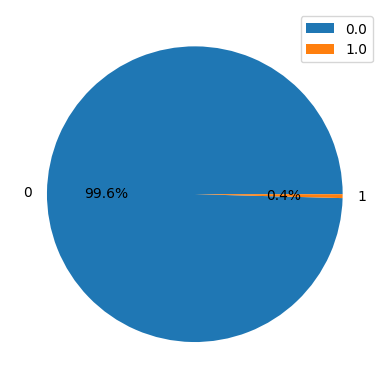

In [281]:
# percentage of class present in target variable(is_fraud)
print("percentage of 0 and 1")
labels=[0,1]
plt.pie(df_test['is_fraud'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.legend(df_test['is_fraud'].value_counts().index)

In [282]:
 #checking duplicate entries
print("Duplicate entries:", df_test.duplicated().sum())

Duplicate entries: 0


In [283]:
#dropping irrelevent columns
df_test.drop(['Unnamed: 0','trans_date_trans_time'],axis=1,inplace=True)

In [284]:
#encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for column in df_test.select_dtypes(include=['object']).columns:
    df_test[column] = le.fit_transform(df_test[column])
df_test

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,319,10,2.86,151,114,1,338,157,39,...,33.9659,-80.9355,333497,275,371,37170,1.371817e+09,33.986391,-81.200714,0.0
1,3573030041201292,591,10,29.84,163,455,0,351,16,43,...,40.3207,-110.4360,302,391,753,40999,1.371817e+09,39.450498,-109.960431,0.0
2,3598215285024754,611,5,41.28,24,248,0,854,61,33,...,40.6729,-73.5365,34496,259,414,163606,1.371817e+09,40.495810,-74.196111,0.0
3,3591919803438423,222,9,60.05,42,455,1,317,755,8,...,28.5697,-80.8191,54767,406,711,27150,1.371817e+09,28.812398,-80.883061,0.0
4,3526826139003047,292,13,3.19,247,260,1,542,246,21,...,44.2529,-85.0170,1126,196,176,71990,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209528,372520049757633,347,11,4.59,214,347,0,405,631,22,...,48.6031,-93.2977,136,60,882,163072,1.378144e+09,49.268416,-93.112025,0.0
209529,676102124465,461,6,12.01,246,276,0,805,516,4,...,38.4549,-122.2564,94014,19,667,9724,1.378144e+09,39.212464,-122.383972,0.0
209530,4607072969078276,438,12,4.44,40,332,0,26,167,35,...,35.8985,-97.2607,1493,21,657,83115,1.378144e+09,35.625168,-96.975622,0.0
209531,4671727014157745,19,1,96.24,194,113,1,353,22,14,...,40.8618,-85.6067,2304,384,177,62796,1.378144e+09,40.615751,-85.380118,0.0


In [285]:
corre=df_test.corr()


<Axes: >

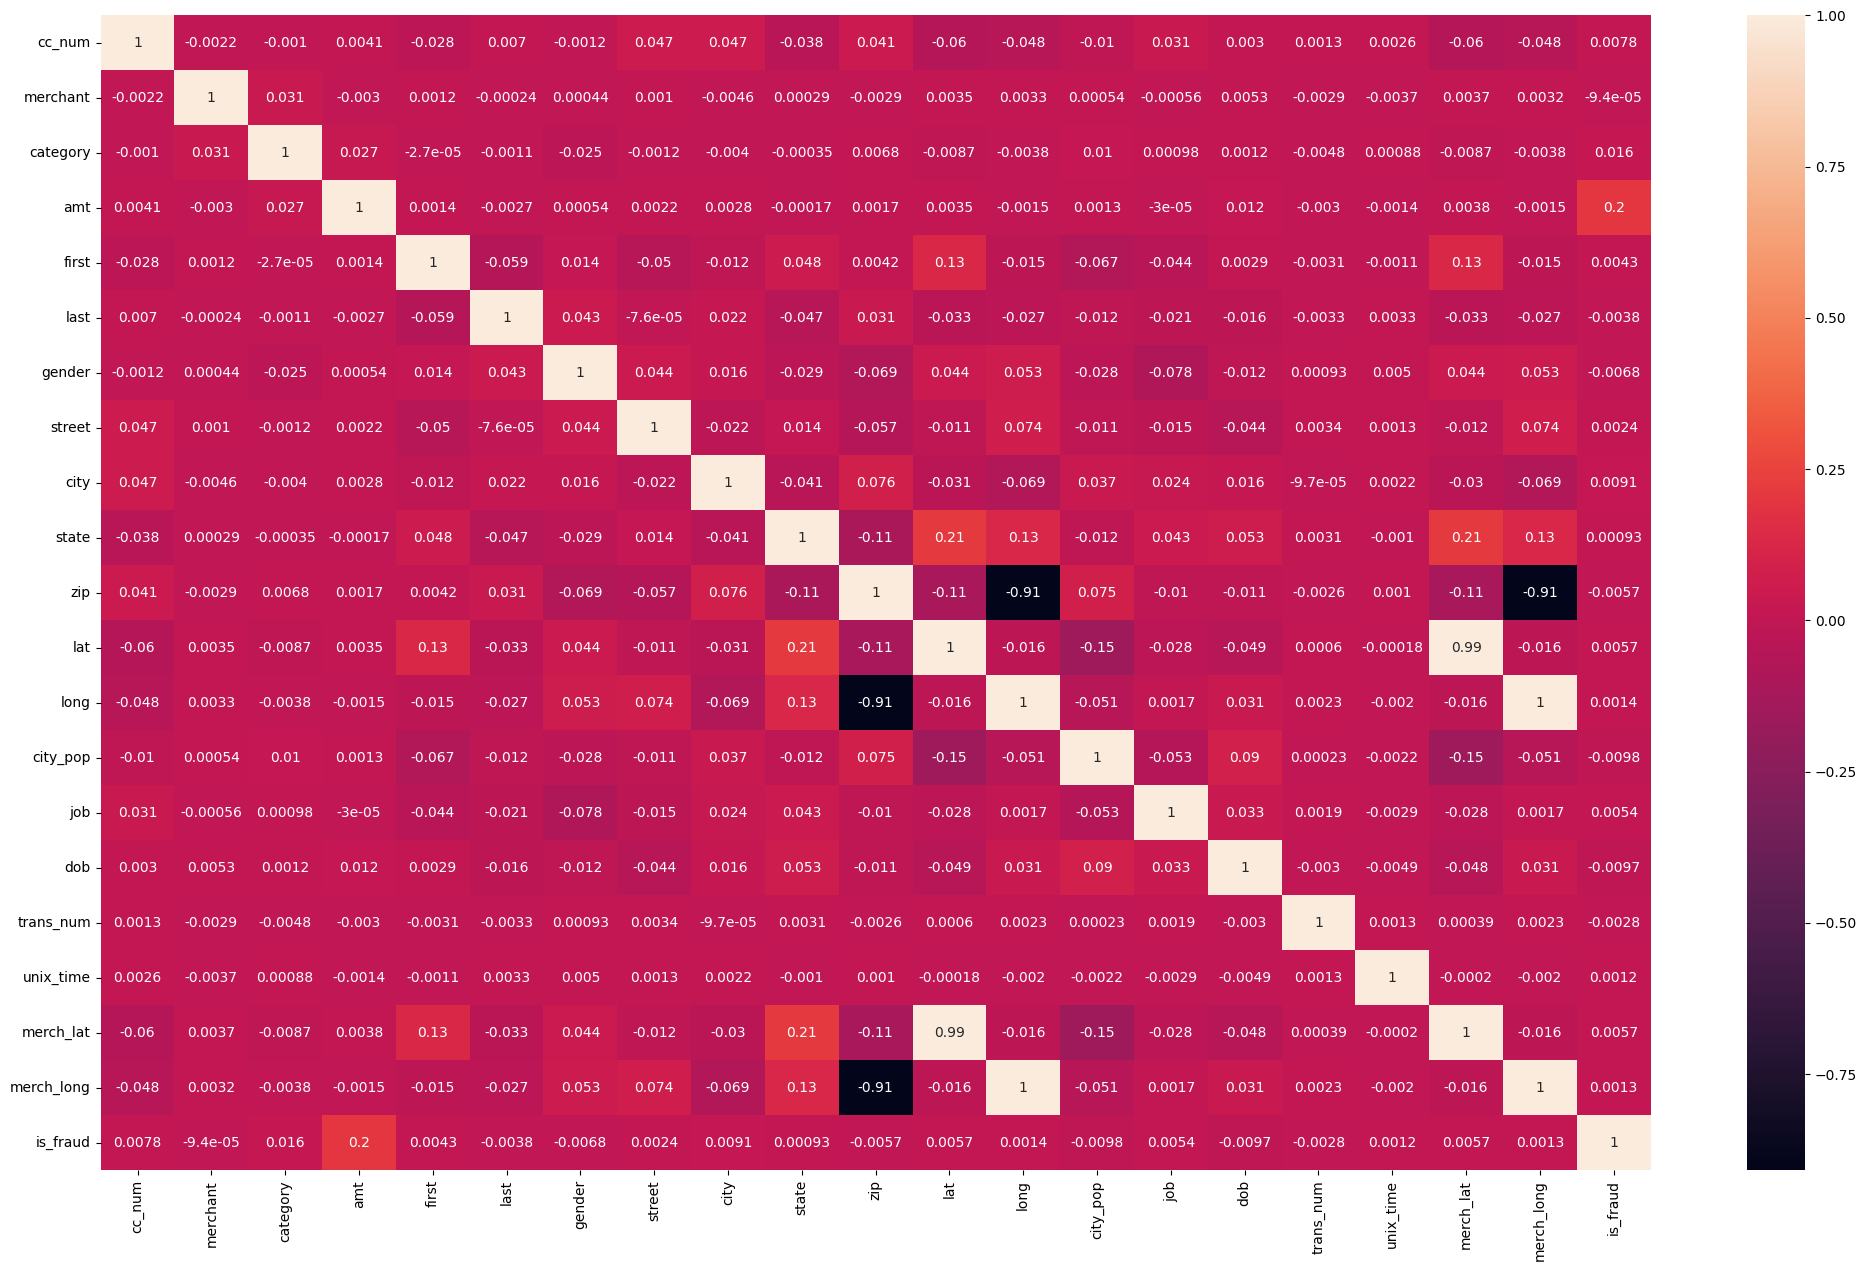

In [286]:
#Drawing a heatmap in order to find out the correlation
plt.figure(figsize=(25,15))
sns.heatmap(corre,annot=True)

<Axes: >

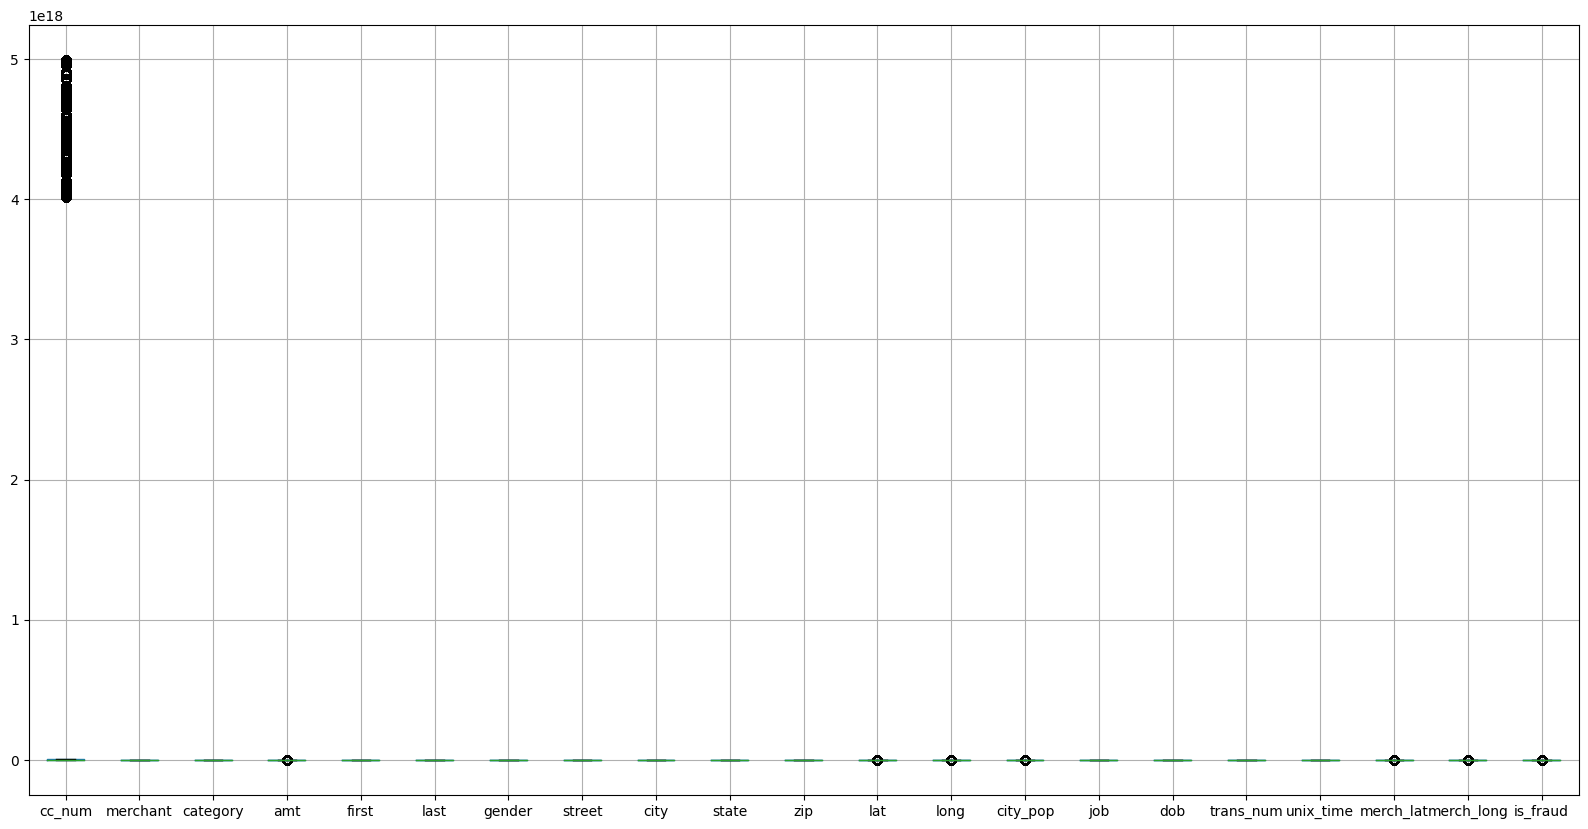

In [287]:
#plotting boxplot for finding outlayers
plt.figure(figsize=(20,10))
df_test.boxplot()

In [288]:
columns1=df_test.columns[df_test.columns !='is_fraud']
columns1

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'],
      dtype='object')

In [289]:
#outlayers is removed by using IQR method
def iqr_rem(dfe,cols):
  for col in cols:
    q1=dfe[col].quantile(0.25)
    q3=dfe[col].quantile(0.75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    dfe[col]=dfe[col].clip(lower_bound,upper_bound)
iqr_rem(df_test,columns1)

<Axes: >

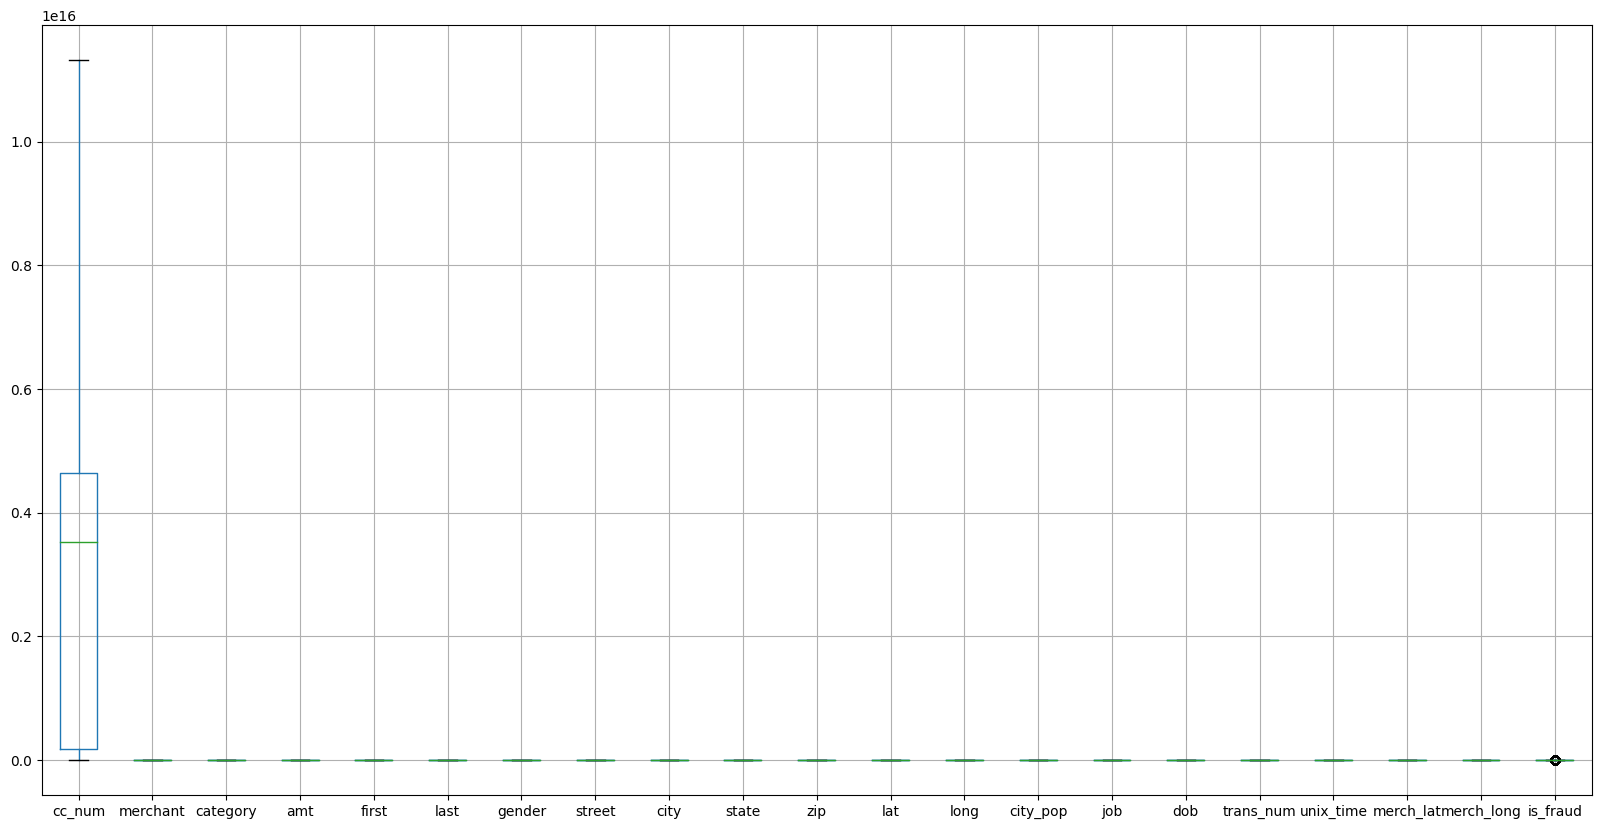

In [290]:
plt.figure(figsize=(20,10))
df_test.boxplot()

In [291]:
df_test['is_fraud'] = df_test['is_fraud'].astype('int')

In [292]:
#splitting test data into x_test and y_test
x_test = df_test.drop(['is_fraud'], axis=1)
x_test

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,2291163933867244,319,10,2.86,151,114,1,338,157,39,29209,33.9659,-80.9355,49708.5,275,371,37170,1.371817e+09,33.986391,-81.200714
1,3573030041201292,591,10,29.84,163,455,0,351,16,43,84002,40.3207,-110.4360,302.0,391,753,40999,1.371817e+09,39.450498,-109.960431
2,3598215285024754,611,5,41.28,24,248,0,854,61,33,11710,40.6729,-73.5365,34496.0,259,414,163606,1.371817e+09,40.495810,-74.196111
3,3591919803438423,222,9,60.05,42,455,1,317,755,8,32780,28.5697,-80.8191,49708.5,406,711,27150,1.371817e+09,28.812398,-80.883061
4,3526826139003047,292,13,3.19,247,260,1,542,246,21,49632,44.2529,-85.0170,1126.0,196,176,71990,1.371817e+09,44.959148,-85.884734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209528,372520049757633,347,11,4.59,214,347,0,405,631,22,56668,48.6031,-93.2977,136.0,60,882,163072,1.378144e+09,49.268416,-93.112025
209529,676102124465,461,6,12.01,246,276,0,805,516,4,94558,38.4549,-121.7322,49708.5,19,667,9724,1.378144e+09,39.212464,-121.821800
209530,4607072969078276,438,12,4.44,40,332,0,26,167,35,73027,35.8985,-97.2607,1493.0,21,657,83115,1.378144e+09,35.625168,-96.975622
209531,4671727014157745,19,1,96.24,194,113,1,353,22,14,46702,40.8618,-85.6067,2304.0,384,177,62796,1.378144e+09,40.615751,-85.380118


In [293]:
y_test = df_test['is_fraud']


In [294]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [295]:
#model creation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
dec=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
lr=LogisticRegression()
lst=[dec,rf,lr]

model is DecisionTreeClassifier(criterion='entropy')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208648
           1       0.24      0.08      0.12       885

    accuracy                           1.00    209533
   macro avg       0.62      0.54      0.56    209533
weighted avg       0.99      1.00      0.99    209533

Accuracy score of DecisionTreeClassifier(criterion='entropy')   0.9950365813499544
*********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

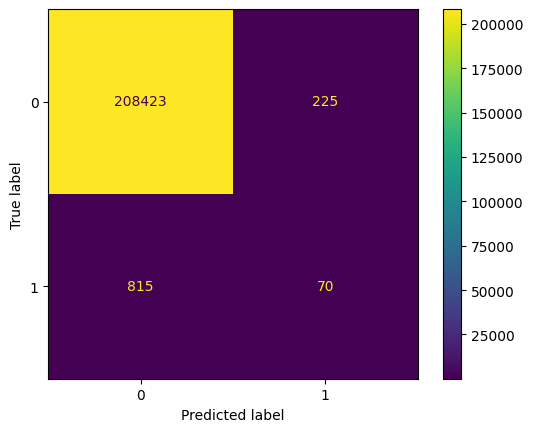

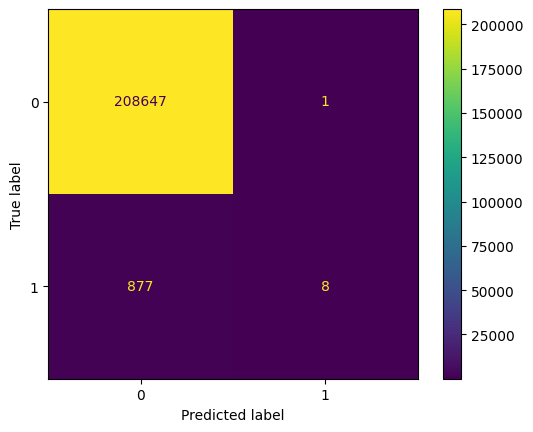

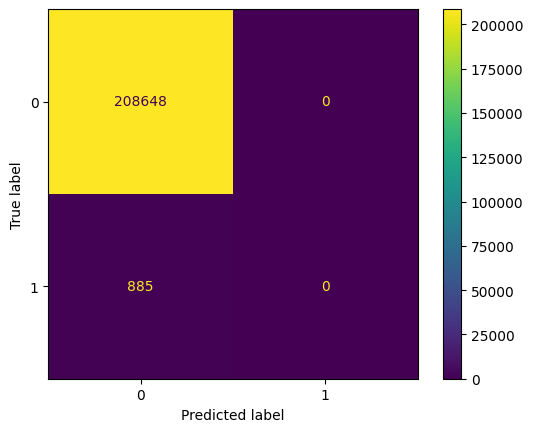

In [296]:
for i in lst:
   print("model is",i)
   i.fit(x_train,y_train)
   y_pred=i.predict(x_test)
   print(classification_report(y_test,y_pred))
   print("Accuracy score of",i," ",accuracy_score(y_test,y_pred))
   labels=[0,1]
   result=confusion_matrix(y_test,y_pred)
   cmd=ConfusionMatrixDisplay(result,display_labels=labels)
   cmd.plot()
   print("*"*1000)

             Algorithms  Accuracy
0         Decision Tree     99.48
1         Random Forest     99.58
2  Logistics Regression     99.57


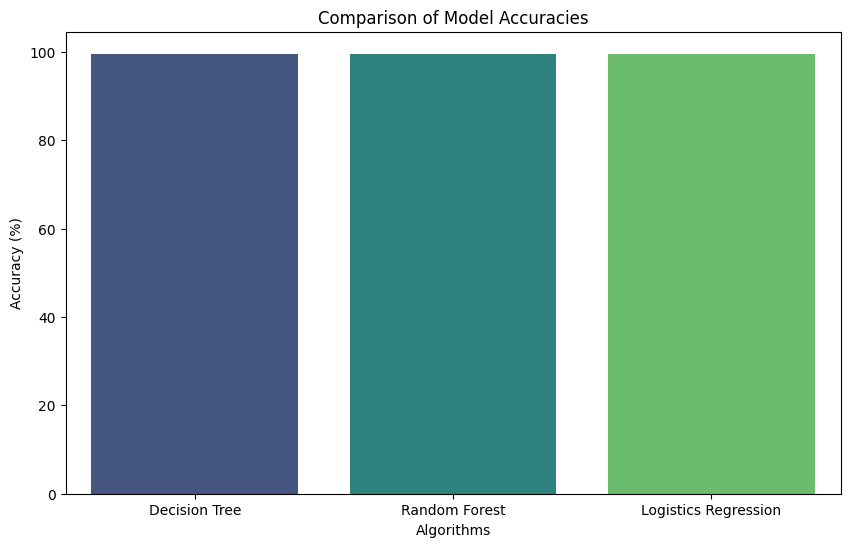

In [297]:
# Define the algorithms and their accuracy scores
alg = ['Decision Tree', 'Random Forest', 'Logistics Regression']
accuracy_scores = [0.9948, 0.9958, 0.9957]

# Create the DataFrame
metrics_df = pd.DataFrame({'Algorithms': alg, 'Accuracy': accuracy_scores})

# Multiply the scores by 100 to get percentage
metrics_df['Accuracy'] *= 100

# Print the DataFrame
print(metrics_df)

# Plotting the bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithms', y='Accuracy', data=metrics_df, palette='viridis')

# Add title and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')

# Show the plot
plt.show()